Linear Regression

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = datasets.load_diabetes()

In [3]:
data.feature_names
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"])

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
target

,MEDV
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [7]:
X = df["bmi"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    1.51e-08
Time:                        20:57:38   Log-Likelihood:                         -2882.5
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     441   BIC:                                      5771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          949.4353    164.610      5.768      0.000     625.918    1272.952
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
X = df["bmi"] 
y = target["MEDV"] 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.47e-42
Time:                        20:57:42   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X = df[["bmi", "bp"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.077
Method:                 Least Squares   F-statistic:                              19.33
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    8.99e-09
Time:                        20:57:45   Log-Likelihood:                         -2879.9
No. Observations:                 442   AIC:                                      5764.
Df Residuals:                     440   BIC:                                      5772.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          790.3966    178.391      4.431      0.000     439.792    1141.002
bp           402.2067    178.391      2.255      0.025      51.602     752.812
==============================================================================
Omnibus:                       12.428   Durbin-Watson:                   0.259
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.822
Skew:                           0.171   Prob(JB):                       0.0200
Kurtosis:                       2.446   Cond. No.                         1.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from sklearn import linear_model

In [11]:
from sklearn import datasets
data = datasets.load_diabetes() 

In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"])

In [13]:
X = df
y = target["MEDV"]

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [15]:
predictions = lm.predict(X)
print(predictions[0:5])

[206.11706979  68.07234761 176.88406035 166.91796559 128.45984241]


In [16]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(predictions,y),mean_squared_error(predictions,y))

0.06856376672605669 2859.6903987680657


In [17]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
lm.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [19]:
lm.intercept_

152.1334841628965

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Residual')

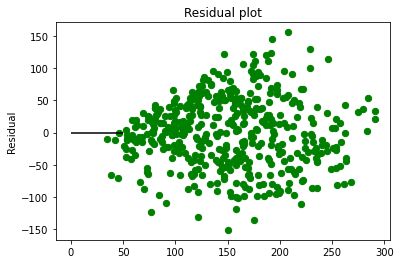

In [21]:
plt.scatter(predictions, predictions-y, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot')
plt.ylabel('Residual')

X Validation

In [22]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [23]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes() 
df = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target 

In [24]:
print(df)

          age       sex       bmi  ...       tch       ltg       glu
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]


In [27]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [28]:
print(predictions[0:5])
print(y_test[0:5])

[134.52476534 216.08273286 101.45414731 113.04122771 161.64544748]
[111.  77.  93.  74. 160.]


Text(0, 0.5, 'Predictions')

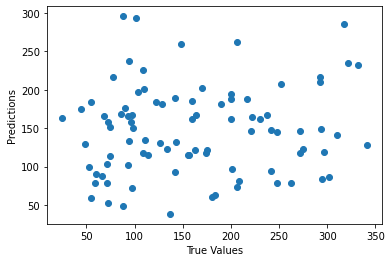

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [30]:
print ("Score:", model.score(X_test, y_test))

Score: 0.45400338713586363


In [31]:
import numpy as np
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [32]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [33]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [34]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

columns = "age sex bmi map tc ldl hdl tch ltg glu".split() 
diabetes = datasets.load_diabetes() 
X = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target 

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = linear_model.LinearRegression()

scores = cross_val_score(model, X, y , cv=cv, n_jobs=-1)

print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.470 (0.090)


In [35]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

columns = "age sex bmi map tc ldl hdl tch ltg glu".split() 
diabetes = datasets.load_diabetes() 
X = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = linear_model.LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)

print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.472 (0.124)


-1 mean=0.4703 se=0.030
-2 mean=0.4700 se=0.025
-3 mean=0.4717 se=0.023
-4 mean=0.4733 se=0.018
-5 mean=0.4766 se=0.016
-6 mean=0.4750 se=0.015
-7 mean=0.4732 se=0.014
-8 mean=0.4735 se=0.012
-9 mean=0.4709 se=0.012
-10 mean=0.4701 se=0.011
-11 mean=0.4699 se=0.011
-12 mean=0.4688 se=0.011
-13 mean=0.4692 se=0.010
-14 mean=0.4694 se=0.010
-15 mean=0.4694 se=0.010
-16 mean=0.4706 se=0.009
-17 mean=0.4713 se=0.009
-18 mean=0.4725 se=0.009
-19 mean=0.4729 se=0.008
-20 mean=0.4721 se=0.008
-21 mean=0.4725 se=0.008
-22 mean=0.4716 se=0.008
-23 mean=0.4720 se=0.008
-24 mean=0.4723 se=0.007
-25 mean=0.4731 se=0.007
-26 mean=0.4724 se=0.007
-27 mean=0.4727 se=0.007
-28 mean=0.4727 se=0.007
-29 mean=0.4722 se=0.007


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


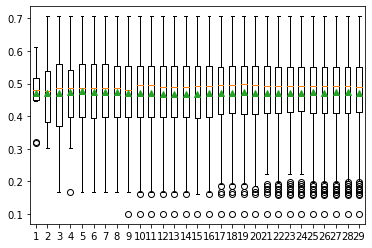

In [36]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from matplotlib import pyplot

def evaluate_model(X, y, repeats):
	
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	
	model = linear_model.LinearRegression()
	
	scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1)
	return scores

columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes() 
X = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target 

repeats = range(1,30)
results = list()
for r in repeats:
	
	scores = evaluate_model(X, y, r)
	
	print('-%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	
	results.append(scores)

pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

Forward Selection

In [37]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [38]:
mid_df =pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv')
mid_df.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [39]:
print("Number of null values:", mid_df["popother"].isnull().sum())

Number of null values: 0


In [40]:
print("Dimensions of original data:", mid_df.shape)
mid_df_clean   = mid_df.dropna()

print("Dimensions of modified data:", mid_df_clean.shape)

print("Number of null values:", mid_df_clean["popother"].isnull().sum())

Dimensions of original data: (437, 28)
Dimensions of modified data: (437, 28)
Number of null values: 0


In [41]:
mid_df_clean.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [42]:
dummies = pd.get_dummies(mid_df_clean[['county', 'state', 'category']])

y = mid_df_clean.popother

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = mid_df_clean.drop(['popother', 'county', 'state', 'category'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['county_ADAMS', 'state_IL', 'category_AAR']]], axis=1)

In [43]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [44]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

NameError: ignored

In [45]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

KeyError: ignored

Backward Selection

In [46]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
  
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
  
    return best_model

In [47]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('PID', 'area', 'poptotal', 'popdensity', 'popwhite', 'popblack', 'popamerindian', 'popasian', 'percwhite', 'percblack', 'percamerindan', 'percasian', 'percother', 'popadults', 'perchsd', 'percollege', 'percprof', 'poppovertyknown', 'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert', 'percadultpoverty', 'percelderlypoverty', 'inmetro', 'county_ADAMS', 'state_IL')


NameError: ignored

In [48]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------


KeyError: ignored

In [49]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------


AttributeError: ignored

Ridge

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [51]:
alphas = 10**np.linspace(10,-2,100) *0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [52]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 27)

Text(0, 0.5, 'weights')

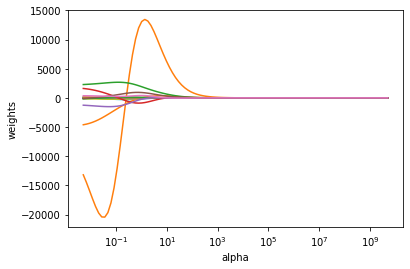

In [53]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [54]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [55]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)            
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2))          

PID                        -0.299662
area                    19672.891432
poptotal                    0.005559
popdensity                  0.107905
popwhite                    0.007308
popblack                    0.025711
popamerindian               1.423946
popasian                    0.190106
percwhite                 -27.905243
percblack                  39.895035
percamerindan             -15.167900
percasian                 492.688724
percother                1246.179354
popadults                   0.008617
perchsd                   -44.705229
percollege                -27.132213
percprof                  -41.799190
poppovertyknown             0.005668
percpovertyknown           37.405342
percbelowpoverty            5.621531
percchildbelowpovert        7.266809
percadultpoverty           -1.475295
percelderlypoverty         47.150888
inmetro                  -339.571021
county_ADAMS                0.000000
state_IL                  779.399278
category_AAR              212.194630
d

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [56]:
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)            
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))          

PID                    -1.897446e-10
area                    1.754132e-05
poptotal                6.405853e-12
popdensity              1.960320e-10
popwhite                9.142584e-12
popblack                2.680117e-11
popamerindian           1.959886e-09
popasian                1.922816e-10
percwhite              -9.460102e-08
percblack               1.728751e-07
percamerindan          -5.019685e-09
percasian               1.347758e-06
percother               1.464978e-06
popadults               9.928581e-12
perchsd                 7.299133e-09
percollege              5.734718e-08
percprof                1.448612e-07
poppovertyknown         6.521199e-12
percpovertyknown        2.978614e-08
percbelowpoverty        4.308746e-09
percchildbelowpovert    1.475459e-08
percadultpoverty       -5.460545e-10
percelderlypoverty     -2.433599e-08
inmetro                 7.030544e-07
county_ADAMS            0.000000e+00
state_IL                7.634365e-07
category_AAR           -4.377010e-07
d

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [57]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             
pred = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))           

PID                     8.550784e-14
area                   -4.982098e-09
poptotal                1.000000e+00
popdensity             -1.162652e-14
popwhite               -1.000000e+00
popblack               -1.000000e+00
popamerindian          -1.000000e+00
popasian               -1.000000e+00
percwhite              -3.451720e-04
percblack              -3.451720e-04
percamerindan          -3.451720e-04
percasian              -3.451720e-04
percother              -3.451720e-04
popadults              -7.806507e-15
perchsd                 1.684963e-12
percollege             -8.180625e-12
percprof               -9.799560e-13
poppovertyknown        -1.249485e-14
percpovertyknown        4.257125e-12
percbelowpoverty       -5.593969e-11
percchildbelowpovert    1.810025e-11
percadultpoverty        2.878506e-11
percelderlypoverty      1.003640e-11
inmetro                 1.997128e-11
county_ADAMS           -6.427124e-10
state_IL                1.237168e-10
category_AAR            5.692447e-11
d

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [58]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [59]:
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [60]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


34990531.67588542

In [61]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


PID                         0.357908
area                   -13184.980159
poptotal                    0.009525
popdensity                 -0.408463
popwhite                   -0.038084
popblack                    0.011000
popamerindian               0.041073
popasian                    1.972275
percwhite                  13.486209
percblack                  24.987629
percamerindan             -54.647386
percasian               -4605.989018
percother                2283.345629
popadults                   0.016170
perchsd                   -21.277870
percollege                 10.480325
percprof                   35.281861
poppovertyknown             0.007772
percpovertyknown         -145.813403
percbelowpoverty          123.043817
percchildbelowpovert      -89.346260
percadultpoverty          136.461653
percelderlypoverty       -140.078088
inmetro                  1611.816306
county_ADAMS            -1254.468307
state_IL                 -106.204414
category_AAR              364.553987
d

Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

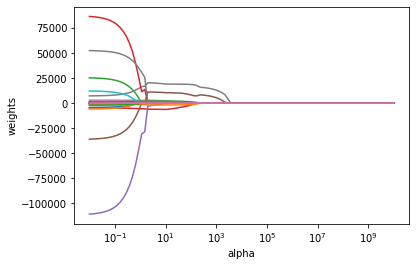

In [62]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [63]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

31755767.732107677

In [64]:
pd.Series(lasso.coef_, index=X.columns)

PID                         0.128082
area                   -36024.149580
poptotal                    0.000000
popdensity                 -0.694901
popwhite                   -0.001976
popblack                    0.111844
popamerindian               2.265916
popasian                    1.453510
percwhite                 115.647040
percblack                  -0.000000
percamerindan              -0.000000
percasian               -2813.278271
percother                2084.811116
popadults                   0.000000
perchsd                    -0.000000
percollege                 -0.000000
percprof                   -0.000000
poppovertyknown             0.000000
percpovertyknown          -85.476490
percbelowpoverty            0.000000
percchildbelowpovert        0.000000
percadultpoverty           10.091136
percelderlypoverty         -0.000000
inmetro                   598.089455
county_ADAMS                0.000000
state_IL                   65.532639
category_AAR               -0.000000
d

Elastic Net

In [66]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

url = 'https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

model = ElasticNet(alpha=1.0, l1_ratio=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 943, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 576, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklea

PCR

In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [68]:
url='https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv'
df = pd.read_csv(url).dropna()
df.info()
dummies = pd.get_dummies(df[['county', 'state', 'category']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [69]:
y = df.popother

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['popother', 'county', 'state', 'category'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['county_ADAMS', 'state_IL', 'category_AAR']]], axis=1)

In [70]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X)) 
pd.DataFrame(pca.components_.T) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-0.000956,-0.009323,-0.014329,0.605191,-0.079737,-0.240022,-0.019305,-0.168010,-0.130751,0.120089,-0.063613,-0.644918,0.101628,-0.147605,-0.067585,0.027944,0.043643,-0.118336,0.033520,0.093123,0.149128,-0.062335,-0.010072,0.001937,-0.000278,0.000866,-1.864768e-10
1,0.023684,0.016026,-0.076667,0.388179,0.375549,0.017731,0.186765,-0.599874,0.229266,-0.234228,0.154896,0.344180,0.089801,0.103071,0.009334,-0.100230,0.110529,0.083312,0.057705,-0.014381,0.053934,0.046751,0.007150,0.000021,-0.000731,0.000496,-8.554078e-11
2,0.316230,0.063195,0.142777,0.000632,0.055973,-0.059354,-0.018055,0.038419,0.043741,-0.013552,0.041207,-0.009107,-0.026424,-0.006457,-0.094870,-0.039658,0.047949,0.025856,0.000389,0.079528,-0.116482,-0.174996,0.026294,0.051728,-0.580915,-0.676503,-2.643839e-09
3,0.302322,0.038265,0.084283,-0.009740,-0.077429,-0.045670,-0.057987,0.060384,-0.128227,-0.105381,-0.082649,-0.095344,-0.027681,0.030374,0.386673,0.054413,0.395198,0.532518,0.178827,-0.142410,0.246238,0.366351,0.015857,-0.001734,-0.009645,0.002023,-2.944233e-10
4,0.319960,0.036528,0.113152,0.005853,0.029840,-0.063156,-0.017895,0.027515,0.045488,-0.032325,0.010731,-0.023733,0.004114,0.052083,-0.019625,-0.028271,0.139376,0.203427,-0.201652,0.281841,-0.216389,-0.357404,0.024114,0.531803,0.480526,0.004579,1.143248e-08
5,0.287480,0.117286,0.183743,-0.007410,0.074061,-0.043939,-0.030461,0.042349,-0.028063,-0.042716,0.083950,0.032617,-0.109792,-0.151630,-0.145987,-0.065511,-0.089028,-0.343017,0.649046,-0.395395,-0.012201,0.018336,0.006318,0.202300,0.208895,-0.000760,5.484149e-09
6,0.275741,0.104237,0.032984,0.182212,-0.007972,0.103474,0.005567,0.056146,0.010587,-0.111857,0.109641,0.101278,-0.140526,-0.136298,0.645094,0.286755,-0.313466,-0.359403,-0.219121,0.105920,0.078935,0.017157,0.002615,-0.005222,0.005740,-0.000064,4.878355e-11
7,0.280154,0.064794,0.163190,-0.016490,0.175595,-0.079622,-0.000917,0.123258,0.225179,0.143063,0.082667,-0.047235,0.074266,0.064202,-0.377954,-0.041421,-0.198584,-0.054525,-0.409156,-0.043975,0.311865,0.530351,0.020446,0.088325,0.071376,0.003063,6.289658e-10
8,-0.193227,-0.191122,0.217187,-0.080191,0.193021,-0.420085,-0.069996,0.004571,0.227000,0.067305,0.007042,-0.017394,-0.235251,-0.017505,0.141113,0.075701,0.048060,-0.005394,-0.000577,-0.030988,0.007796,-0.038385,0.015444,-0.000842,0.000504,-0.000091,-7.149193e-01
9,0.211613,0.128547,-0.119615,-0.150842,-0.165095,0.089988,-0.039497,-0.302822,-0.547057,-0.250372,-0.137507,0.047484,0.148994,-0.018236,-0.146107,-0.138882,-0.156809,-0.067097,-0.087855,0.106057,0.017387,0.099868,0.003733,-0.000277,0.001237,0.000430,-5.180564e-01


In [71]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
3.361540e+01,33.615396
1.800668e+01,51.622078
9.966979e+00,61.589057
6.808087e+00,68.397144
5.912362e+00,74.309506
4.503003e+00,78.812509
3.713058e+00,82.525567
2.937357e+00,85.462924
2.833553e+00,88.296477
2.546834e+00,90.843311


In [72]:
expLianedVariance.size

27

(0.0, 20.0)

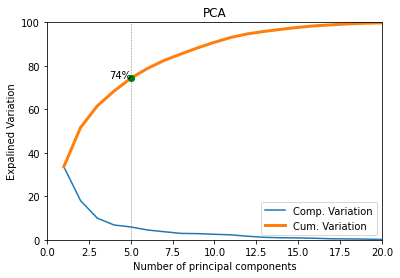

In [73]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (27,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)
#Vertical line at the selected no of components
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')
# add apoint
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,20])

In [74]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,-0.000956,-0.009323,-0.014329,0.605191,-0.079737,-0.240022
1,0.023684,0.016026,-0.076667,0.388179,0.375549,0.017731
2,0.316230,0.063195,0.142777,0.000632,0.055973,-0.059354
3,0.302322,0.038265,0.084283,-0.009740,-0.077429,-0.045670
4,0.319960,0.036528,0.113152,0.005853,0.029840,-0.063156


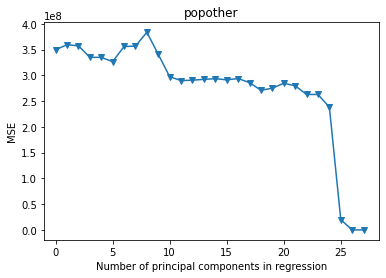

In [75]:
from sklearn.model_selection import KFold
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 28):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
       
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('popother')
plt.xlim(xmin=-1);

In [76]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 33.62,  51.63,  61.6 ,  68.41,  74.32,  78.82,  82.53,  85.47,
        88.3 ,  90.85,  93.11,  94.75,  95.88,  96.83,  97.71,  98.42,
        98.89,  99.3 ,  99.62,  99.77,  99.9 , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  ])

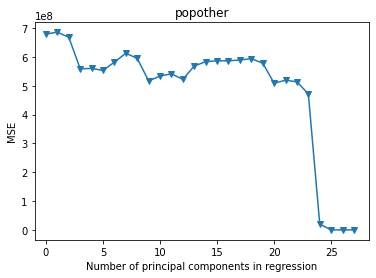

In [78]:
pca2 = PCA()

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 28):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('popother')
plt.xlim(xmin=-1);

In [79]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

450062199.44077724

PLS

(-1.0, 19.9)

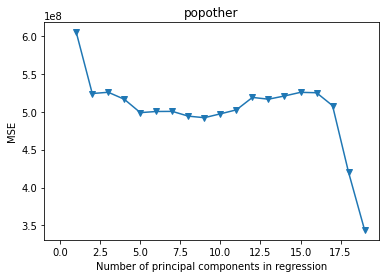

In [81]:
n = len(X_train)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('popother')
plt.xlim(xmin=-1)

In [82]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

457561596.47898674

Grid Search

In [83]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

url = 'https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

model = ElasticNet()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27000 fits failed out of a total of 27000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 943, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 576, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packa

ValueError: ignored

Comparison

In [84]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

url = "https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv"
names = ["PID","county","state","area","poptotal","popdensity","popwhite","popblack",
"popamerindian","popasian","popother","percwhite","percblack","percamerindan","percasian",
"percother","popadults","perchsd","percollege","percprof","poppovertyknown","percpovertyknown",
"percbelowpoverty","percchildbelowpovert","percadultpoverty","percelderlypoverty","inmetro","category"]
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7

models = []
models.append(('LR', LinearRegression()))
models.append(('R', Ridge()))
models.append(('LA', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('PLT', plt()))
models.append(('PCA', PCA()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

TypeError: ignored